# Team:
# Sushma
# Mihir
# Erick

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from scipy import stats
import pandas as pd
import seaborn as sb
%matplotlib inline

Let's suppose we have a set of observations $x=(x_1,â€¦,x_N)^T$, that are drawn independent and identically distributed (i.i.d) from a Gaussian distribution with unknown mean $\mu$ and variance $\sigma^2$

For this example, we are going to assume that the unknown parameters are $\mu$=2 and $\sigma^2$=25 and the number of samples N=100.

#Task1:# 
Plot this (unknown) distribution together with the samples in the range [-20, 20].

100


/home/kramer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


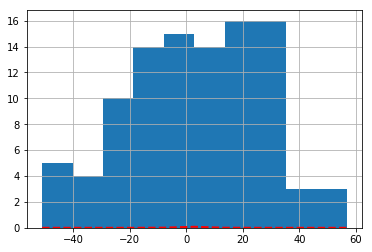

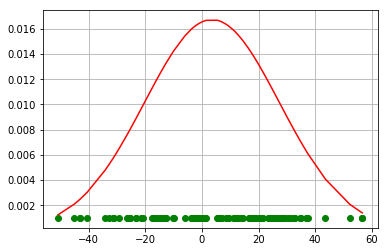

3.548845299868041
23.84055784267295


In [23]:
N = 100
mu = 2
var = 25
sigma = math.sqrt(var)
X_axis = np.linspace(-20,20,N)
X = np.random.normal(mu,var,N)
print (len(X))
n, bins, patches = plt.hist(X)
y = mlab.normpdf( bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.grid()
plt.show()
X.sort()
plt.plot(X, stats.norm.pdf(X, np.mean(X), np.std(X)),'r')
plt.plot(X, [0.001]*len(X), 'go')
plt.grid()
plt.show()

print (np.mean(X))
print (np.std(X))


#Task2:#
* Implement the likelihood function in python (you can simply use the existing python implementations)
* Use a general optimization method to find the values for $\mu$ and $\sigma^2$.

In [107]:
mu_sample = sum(X)/N
var_sample = sum(X-mu)**2/N
print (var_sample)
print (mu_sample)

34.660188010221404
2.5887290379301935


#Task3:#
Given:
<br>
$\mu = \begin{bmatrix}
      0\\[0.3em]
      0\\[0.3em]
     \end{bmatrix}$
<br>
$\Sigma = \begin{bmatrix}
      0.5 & 0\\[0.3em]
      0 & 0.5\\[0.3em]
     \end{bmatrix}$
<br>
1. Visualise a Gaussian with the given parameters.
2. Visualise a marginal Gaussian.
3. Visualise a slice of Gaussian.

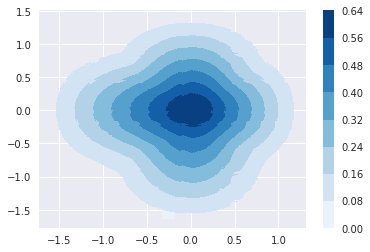

In [21]:
mu = np.array([[0.],[0.]])
mean = np.array([0,0])
#cov = np.array([[0.5, 0.], [0., 0.5]])
sigma_x = 0.5
sigma_y = 0.5
X_mul = np.random.multivariate_normal(mean, cov, 100)

x, y = np.meshgrid(X_mul[:,0], X_mul[:,1])
 
z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2)
     + y**2/(2*sigma_y**2))))

plt.contourf(x, y, z, cmap='Blues')
plt.colorbar()
plt.show()

/home/kramer/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


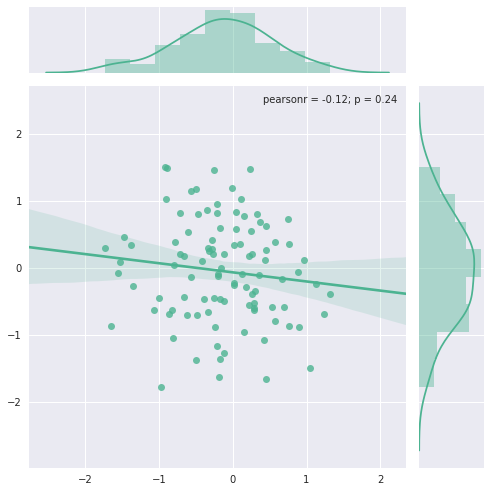

In [28]:
#Marginal distribution
sb.set(style="darkgrid")
g = sb.jointplot(X_mul[:,0], X_mul[:,1], kind="reg",color='#4CB391', size=7)

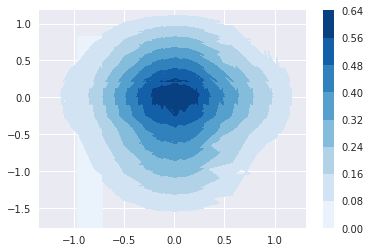

/home/kramer/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


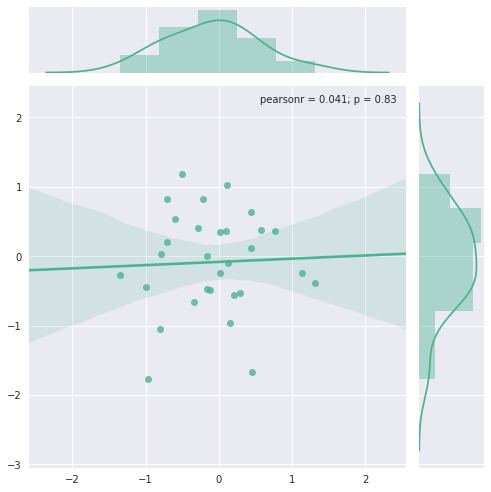

In [29]:
x_sm, y_sm = np.meshgrid(X_mul[30:60,0], X_mul[30:60,1])
z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x_sm**2/(2*sigma_x**2)
     + y_sm**2/(2*sigma_y**2))))

plt.contourf(x_sm, y_sm, z, cmap='Blues')
plt.colorbar()
plt.show()

sb.set(style="darkgrid")
g = sb.jointplot(X_mul[30:60,0], X_mul[30:60,1], kind="reg",color='#4CB391', size=7)

#Task4:#
Given:
    <br>
    Number of samples is 1000 from them 330 samples are labeled as class $A$ and 670 samples 
    are labeled as class $B$. There are 2 features $X1$ and $X2$. It is observed that  $p(A,X1)$=248,  $p(A,X2)$=82, $p(B,X1)$=168, $p(B,X2)$=502
    <br>
Compute:
<br>
Prior $p(A)$, $p(B)$
<br>
Likelihood $p(X1|A)$, $p(X1|B)$
<br>
Posterior $p(A|X1)$

Prior probabilities:

$p(A) = \frac{330}{1000} = 0.33$

$p(B) = \frac{670}{1000} = 0.67$

$p(A,X_1) = \frac{248}{1000} = 0.248$

$p(A,X_2) = \frac{82}{1000} = 0.082$

$p(B,X_1) = \frac{168}{1000} = 0.168$

$p(B,X_2) = \frac{502}{1000} = 0.502$

Likelihood:

$p(X_1 | A) = \frac{P(A,X_1)}{A} = \frac{0.248}{0.33} = 0.75$

$p(X_1 | B) = \frac{P(B,X_1)}{B} = \frac{0.168}{0.67} = 0.25$

Posterior:

$p(A | X_1) = \frac{P(X_1 | A) P(A)}{P(X_1 | A) P(A) + P(X_1 | B) P(B)} = \frac{0.75 * 0.33}{0.75 * 0.33 + 0.25 * 0.67} = 0.60$